Q1. Install MLflow

In [1]:
!mlflow --version

mlflow, version 1.26.1


Q2. Download and preprocess the data

In [2]:
!python preprocess_data.py --raw_data_path ../data --dest_path ./output
!ls ./output | wc -l

4


Q3. Train a model with autolog

In [3]:
!python train.py --data_path ./output

2022/05/29 13:57:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/azureuser/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


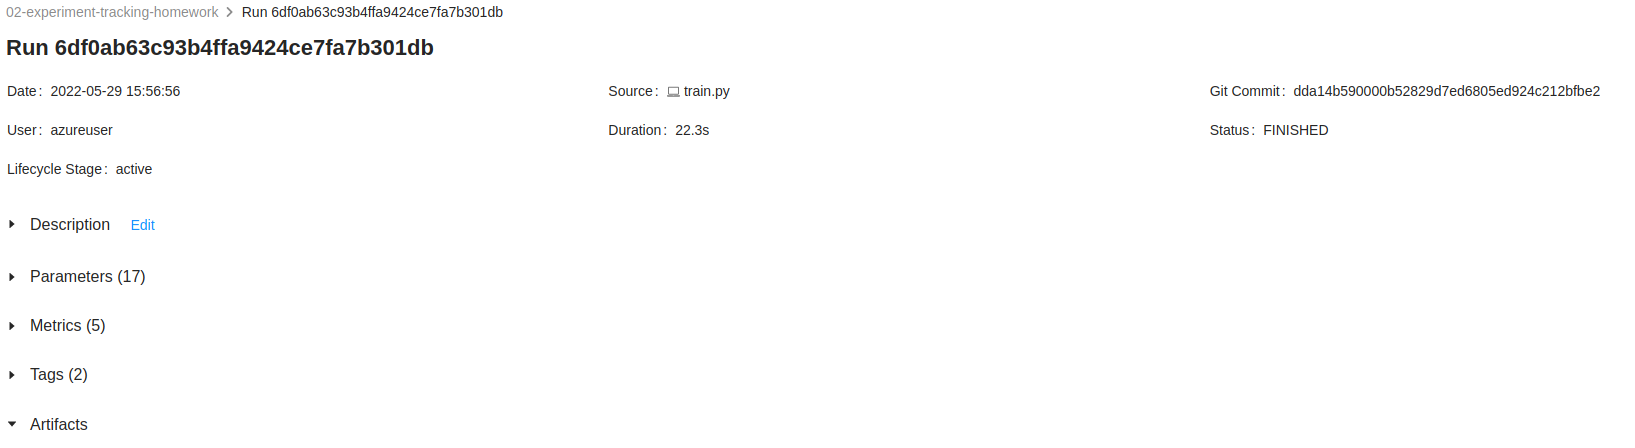

17 parameters are logged

Q4. Launch the tracking server locally
```
mlflow ui --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts
```

Q5. Tune the hyperparameters of the model

In [10]:
!python hpo.py

100%|█████████| 50/50 [07:35<00:00,  9.11s/trial, best loss: 6.6284257482044735]


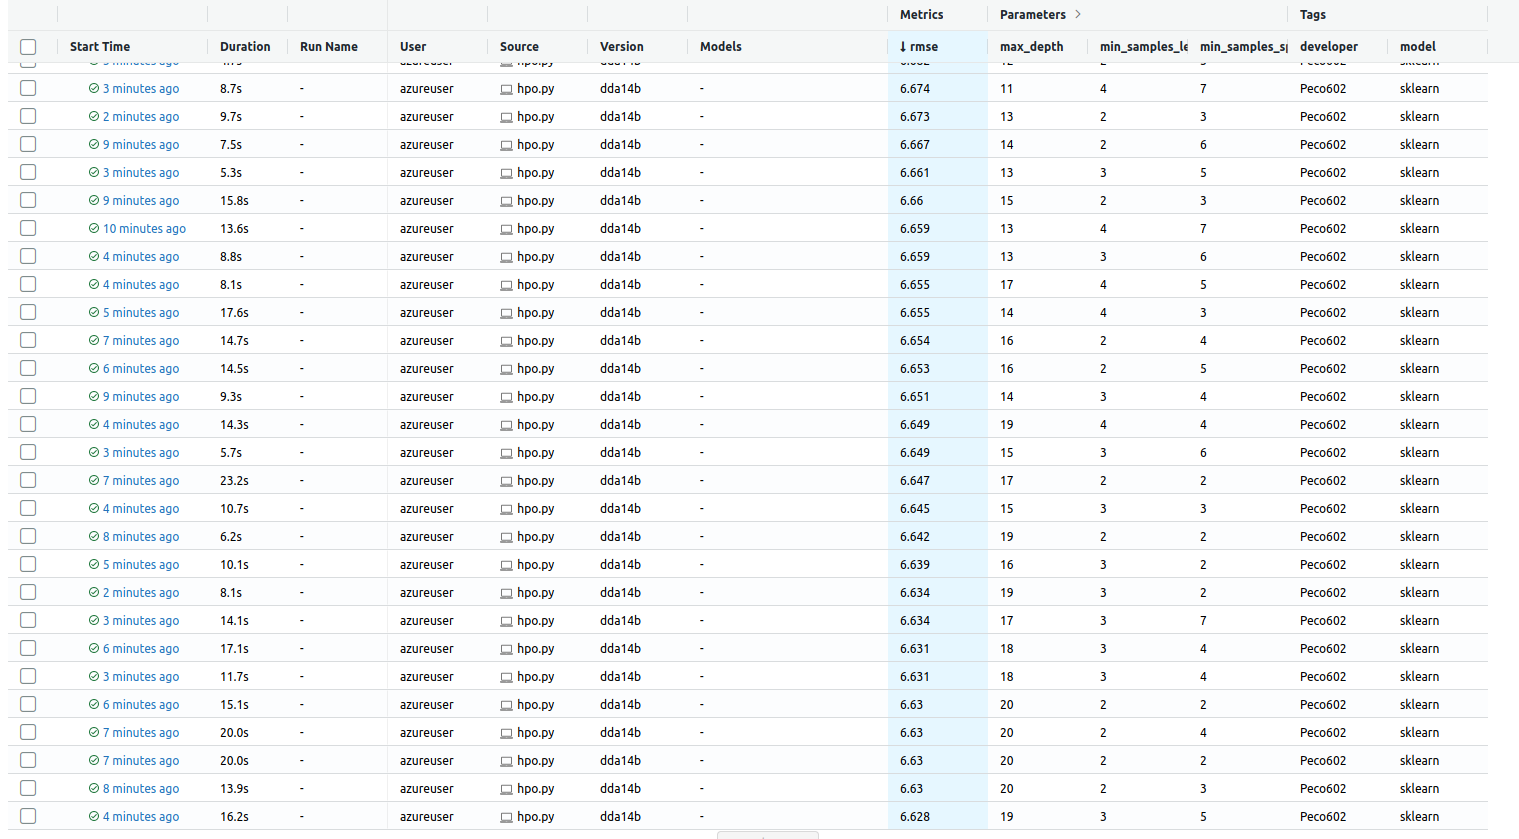

The best validation RMSE is 6.628.

Q6. Promote the best model to the model registry

In [11]:
!python register_model.py

2022/05/29 14:49:15 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2022/05/29 14:49:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/azureuser/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."
Successfully registered model 'nyc-taxi-randomforest'.
2022/05/29 14:50:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: nyc-taxi-randomforest, version 1
Created version '1' of model 'nyc-taxi-randomforest'.


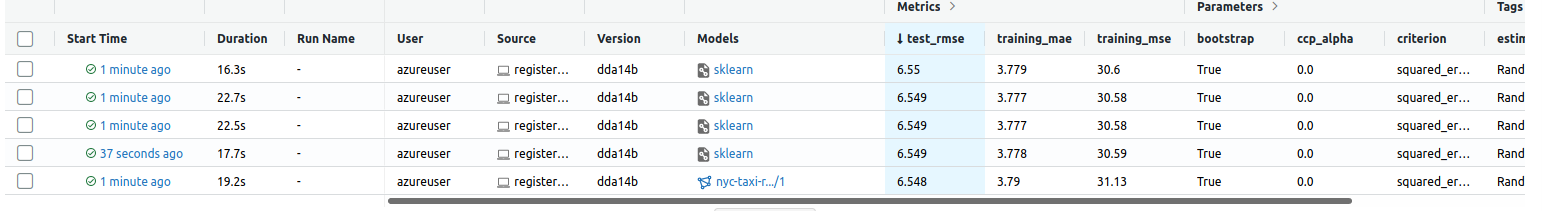

The best test RMSE is 6.548.